In [1]:
import os
import sys

os.environ["JAVA_HOME"] = "jdk8"
os.environ["PYSPARK_PYTHON"] = sys.executable
os.environ["PYSPARK_DRIVER_PYTHON"] = sys.executable

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

spark = SparkSession.builder.appName("vis").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/02/04 17:54:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 58506)
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/socketserver.py", line 755, in __init__
    self.handle()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pyspark/accumulators.py", line 295, in handle
    poll(accum_updates)
  File "/Library/Frameworks/Pyt

In [2]:
pip install pandas matplotlib numpy scikit_learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 6.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 8.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.6/269.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 8.3 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 4.1 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 6.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 3.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pyspark
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris


Matplotlib is building the font cache; this may take a moment.


In [5]:
iris = load_iris()
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data["species"] = iris.target
iris_spark_df = spark.createDataFrame(iris_data)

iris_spark_df.printSchema()


root
 |-- sepal length (cm): double (nullable = true)
 |-- sepal width (cm): double (nullable = true)
 |-- petal length (cm): double (nullable = true)
 |-- petal width (cm): double (nullable = true)
 |-- species: long (nullable = true)



In [6]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
iris_spark_df.show()

+-----------------+----------------+-----------------+----------------+-------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|species|
+-----------------+----------------+-----------------+----------------+-------+
|              5.1|             3.5|              1.4|             0.2|      0|
|              4.9|             3.0|              1.4|             0.2|      0|
|              4.7|             3.2|              1.3|             0.2|      0|
|              4.6|             3.1|              1.5|             0.2|      0|
|              5.0|             3.6|              1.4|             0.2|      0|
|              5.4|             3.9|              1.7|             0.4|      0|
|              4.6|             3.4|              1.4|             0.3|      0|
|              5.0|             3.4|              1.5|             0.2|      0|
|              4.4|             2.9|              1.4|             0.2|      0|
|              4.9|             3.1|    

In [11]:
iris_transformed = iris_spark_df.select(
    col("sepal length (cm)"),
    col("sepal width (cm)") +1
)

iris_transformed.show(5)

+-----------------+----------------------+
|sepal length (cm)|(sepal width (cm) + 1)|
+-----------------+----------------------+
|              5.1|                   4.5|
|              4.9|                   4.0|
|              4.7|                   4.2|
|              4.6|                   4.1|
|              5.0|                   4.6|
+-----------------+----------------------+
only showing top 5 rows



In [12]:
iris_filtered = iris_spark_df.filter(iris_spark_df["sepal length (cm)"] > 5)
iris_filtered.show()

+-----------------+----------------+-----------------+----------------+-------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|species|
+-----------------+----------------+-----------------+----------------+-------+
|              5.1|             3.5|              1.4|             0.2|      0|
|              5.4|             3.9|              1.7|             0.4|      0|
|              5.4|             3.7|              1.5|             0.2|      0|
|              5.8|             4.0|              1.2|             0.2|      0|
|              5.7|             4.4|              1.5|             0.4|      0|
|              5.4|             3.9|              1.3|             0.4|      0|
|              5.1|             3.5|              1.4|             0.3|      0|
|              5.7|             3.8|              1.7|             0.3|      0|
|              5.1|             3.8|              1.5|             0.3|      0|
|              5.4|             3.4|    

In [14]:
iris_aggregated = iris_spark_df.groupBy("species").agg(avg("sepal length (cm)").alias("average_sepal_length"))
iris_aggregated.show()

+-------+--------------------+
|species|average_sepal_length|
+-------+--------------------+
|      0|   5.005999999999999|
|      1|   5.935999999999999|
|      2|   6.588000000000001|
+-------+--------------------+



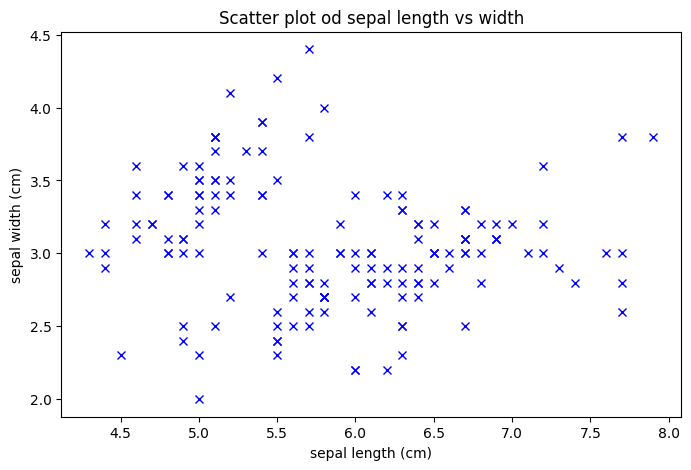

In [17]:
# Using matplotlib

plt.figure(figsize=(8, 5))
plt.plot(iris_data["sepal length (cm)"], iris_data["sepal width (cm)"], "bx")
plt.title("Scatter plot od sepal length vs width")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.savefig("plot of sepal length vs width")

plt.show()



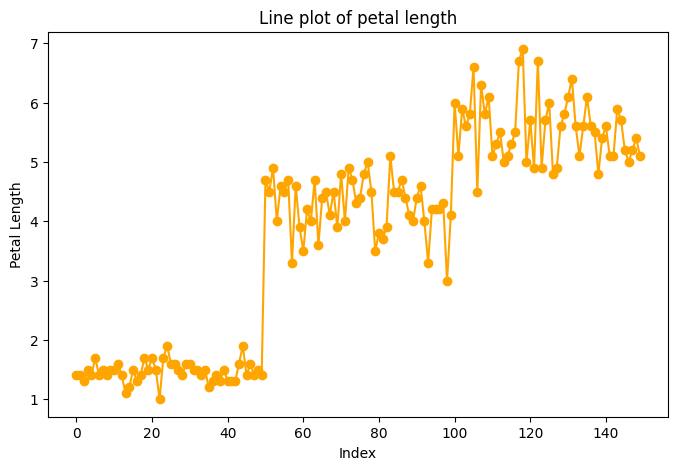

In [19]:
# Using matplotlib

plt.figure(figsize=(8, 5))
plt.plot(iris_data["petal length (cm)"], color="orange", marker="o")
plt.title("Line plot of petal length")
plt.xlabel("Index")
plt.ylabel("Petal Length")

plt.show()

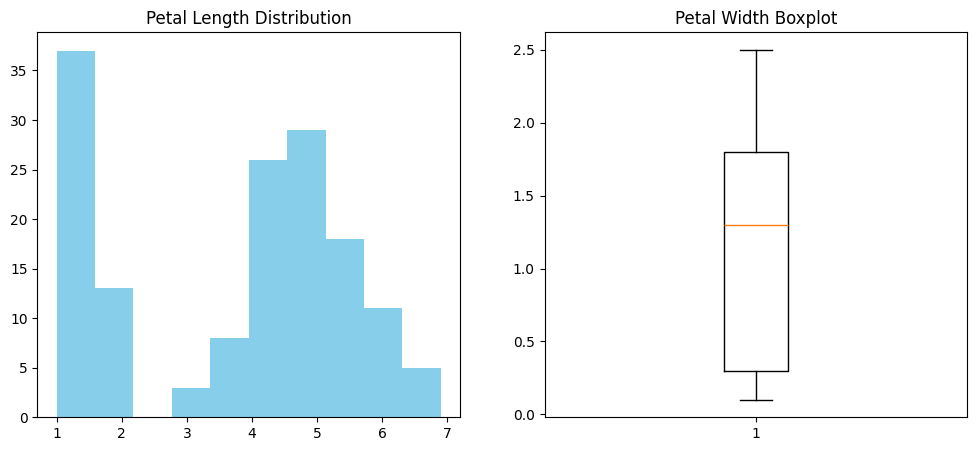

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(iris_data["petal length (cm)"], bins=10, color="skyblue")
ax[0].set_title("Petal Length Distribution")
ax[1].boxplot(iris_data["petal width (cm)"])
ax[1].set_title("Petal Width Boxplot")
plt.show()

In [27]:
def my_func():
    return 1, 2

x, y = my_func()
print(x)
print(y)

1
2


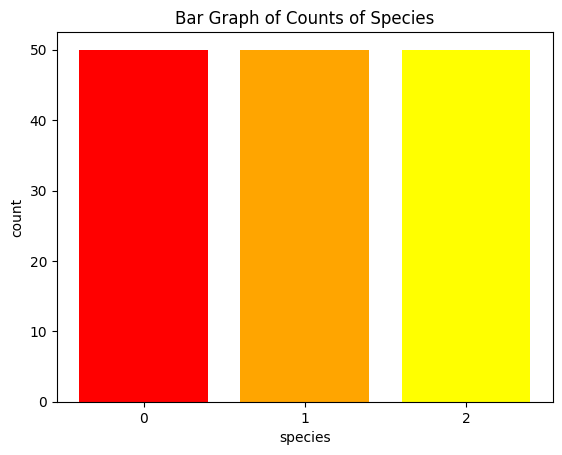

In [38]:
species_counts = iris_data["species"].value_counts()
plt.bar(species_counts.index.astype(str), species_counts.values, color=["red", "orange", "yellow"])
plt.title("Bar Graph of Counts of Species")
plt.xlabel("species")
plt.ylabel("count")
plt.show()

In [29]:
print(iris_data["species"])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [40]:
sales_data = pd.DataFrame({
    "store": ["A", "B", "C", "D", "E"],
    "sales": [100, 150, 200, 250, 300],
    "date": pd.date_range("2024-01-01", periods=5)
})

sales_spark_df = spark.createDataFrame(sales_data)
sales_spark_df.show(5) 

# EXERCISE
# Create a bar plot showing count of category
# Create a scatter plot of value vs index
# Customise the plots with interesting colours and markers
# Create a bar plot of the total sum of each category

+-----+-----+-------------------+
|store|sales|               date|
+-----+-----+-------------------+
|    A|  100|2024-01-01 00:00:00|
|    B|  150|2024-01-02 00:00:00|
|    C|  200|2024-01-03 00:00:00|
|    D|  250|2024-01-04 00:00:00|
|    E|  300|2024-01-05 00:00:00|
+-----+-----+-------------------+



In [47]:
sales_pandas_df = sales_spark_df.toPandas()



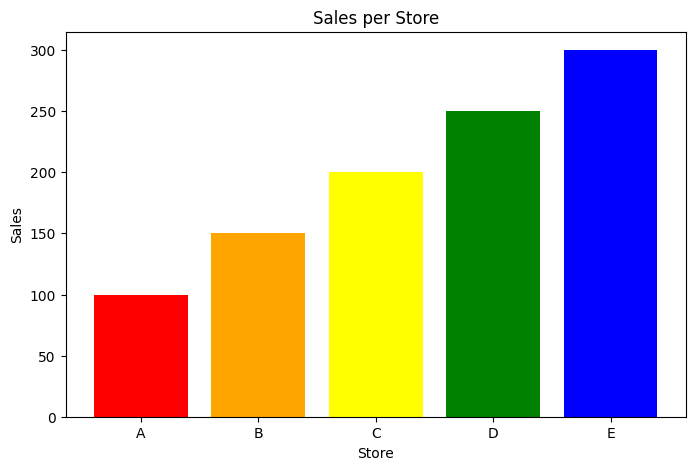

In [48]:
store_counts = sales_data["store"].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(sales_pandas_df["store"], sales_pandas_df["sales"], color=["red", "orange", "yellow", "green", "blue"])
plt.title("Sales per Store")
plt.xlabel("Store")
plt.ylabel("Sales")
plt.show()

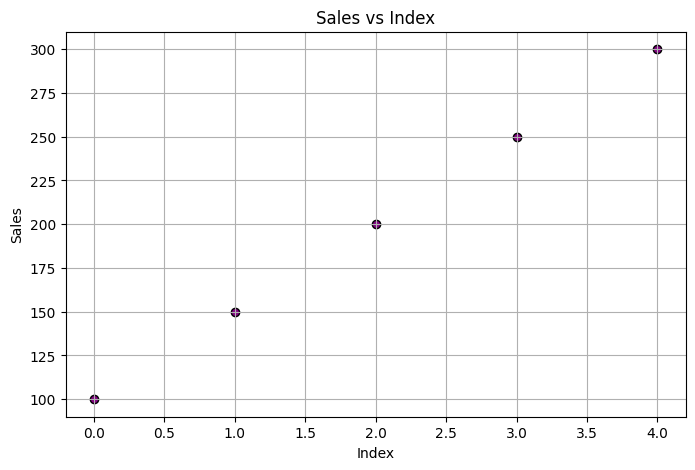

In [51]:
plt.figure(figsize=(8, 5))
plt.grid(True)
plt.scatter(sales_pandas_df.index, sales_pandas_df["sales"], color="purple", marker="o", edgecolors="black")
plt.title("Sales vs Index")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.show()

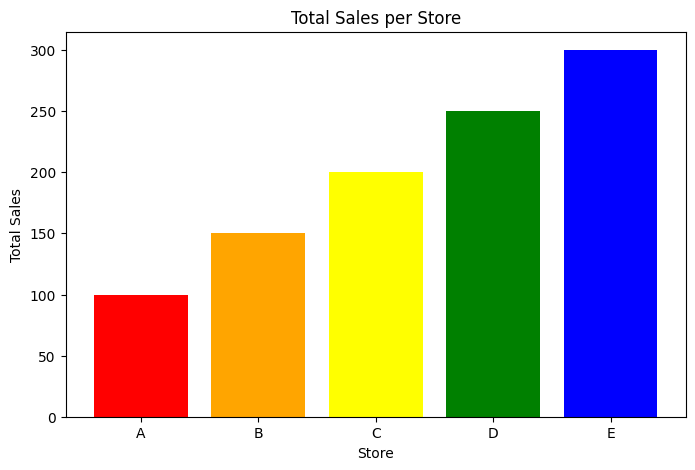

In [54]:
plt.figure(figsize=(8, 5))
plt.bar(sales_pandas_df["store"], sales_pandas_df["sales"], color=["red", "orange", "yellow", "green", "blue"])
plt.title("Total Sales per Store")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.show()